In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

In [2]:
# if necessary, change file path so the csv file will get loaded
df = pd.read_csv('DSCB420 - 2024 - Test - H.csv')
df.head()

,t,x
0,1,0.075551
1,2,1.155489
2,3,0.956906
3,4,0.615985
4,5,-0.298067


## Hinweise zu dieser Aufgabe:

Bearbeiten Sie folgende Aufgaben in den vorgesehenen Bereichen des Notebooks und **laden Sie Ihr Notebook am Ende in  ILIAS-Aufgabe H1** hoch. Wegen der besseren Lesbarkeit ist die Aufgabenstellung auch auf der Papier-Angabe abgedruckt.

Da in der Aufgabe nur Modelle mit wenigen Parametern (gemessen an der Größe des Datensatzes) zum Einsatz kommen, **genügt** es, die geforderten Werte **auf der Trainingsmenge** zu ermitteln. Ein Train/Test-Split oder Kreuzvalisierung sind nicht erforderlich.

Sollten Sie mit der Implementierung nicht weiterkommen, können Sie auch anhand von Kommentaren Ihr (geplantes) Vorgehen erläutern.

### Aufgabe H 1.1:
Welcher Anteil der Varianz der Zeitreihe lässt sich erklären durch die Periodizität (=Saisonalität)?

In [3]:
fig = px.line(
    df, 
    x=df.index, 
    y='x', 
    title='Monatliche Flugpassagier-Zahlen (1949-1960)',
    labels={'Month': 'Datum', 'Anzahl_Passagiere': 'Anzahl der Passagiere'}
)

fig.update_layout(title_x=0.5, xaxis_title="Jahr", yaxis_title="Passagiere pro Monat")

fig.show()

In [4]:
df.head()

,t,x
0,1,0.075551
1,2,1.155489
2,3,0.956906
3,4,0.615985
4,5,-0.298067


In [5]:
df['Saison_bereinigt'] = df['x'].diff(7)
varianzen = df[['x', 'Saison_bereinigt']].var()
varianz_anteile = varianzen / varianzen['x']

print("Analyse der Varianzanteile:")
print(varianz_anteile)

# Anteil der Varianz, der NICHT durch Saisonalität erklärt wird (Trend + Rauschen)
anteil_rest = varianz_anteile['Saison_bereinigt']
# Anteil der Varianz, der DURCH Saisonalität erklärt wird
anteil_saisonalitaet = 1.0 - anteil_rest

print("\n--- Zerlegung der Varianz ---")
print("Von der Gesamtvarianz der Zeitreihe werden %2.1f%% durch die Saisonalität erklärt." % (100.0 * anteil_saisonalitaet))
print("Die restlichen %2.1f%% entfallen auf den Trend und unregelmäßige Schwankungen." % (100.0 * anteil_rest))

# Direkte Antwort auf deine Frage
print(f"\nAntwort: {anteil_saisonalitaet:.1%} der Varianz lässt sich durch die Saisonalität erklären.")

Analyse der Varianzanteile:
x                   1.000000
Saison_bereinigt    0.100649
dtype: float64

--- Zerlegung der Varianz ---
Von der Gesamtvarianz der Zeitreihe werden 89.9% durch die Saisonalität erklärt.
Die restlichen 10.1% entfallen auf den Trend und unregelmäßige Schwankungen.

Antwort: 89.9% der Varianz lässt sich durch die Saisonalität erklären.


#### Antwort auf H 1.1:

Identifizierung der Periodizität: Zunächst müsste man feststellen, ob und welche Art von Periodizität in der Zeitreihe vorhanden ist. Dies könnte saisonale (jährlich, monatlich usw.) oder andere zyklische Muster umfassen.

Modellierung der Periodizität: Anschließend könnte man ein Modell anpassen, das die identifizierte Periodizität berücksichtigt. Zum Beispiel ein SARIMA-Modell für saisonale Zeitreihen.

Berechnung des Anteils der erklärbaren Varianz: Nach der Anpassung des Modells könnte man das Bestimmtheitsmaß (R²) oder andere Metriken verwenden, um zu quantifizieren, wie gut die periodische Komponente die Variation in der Zeitreihe erklärt im Vergleich zur Gesamtvarianz der Zeitreihe.

Datei erfolgreich geladen. Hier sind die ersten 5 Zeilen:
   t         x  Saison_bereinigt
0  1  0.075551               NaN
1  2  1.155489               NaN
2  3  0.956906               NaN
3  4  0.615985               NaN
4  5 -0.298067               NaN

Die Zeitreihe hat 140 Datenpunkte.

Ein Plot der Zeitreihe wurde als 'timeseries_plot.png' gespeichert.
ACF-Plot wurde als 'acf_plot.png' gespeichert.

Perfekt! Der erste Schritt ist getan.
Bitte schau dir die beiden Bilder ('timeseries_plot.png' und 'acf_plot.png') an.
Lass uns als Nächstes die ACF-Grafik analysieren, um die Periode zu finden.


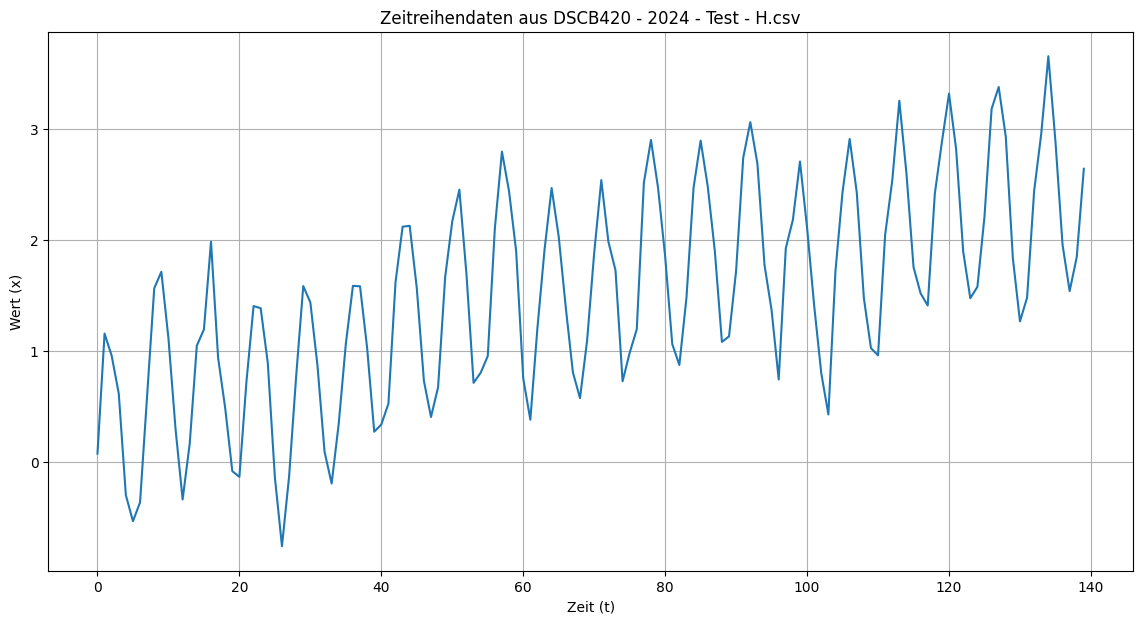

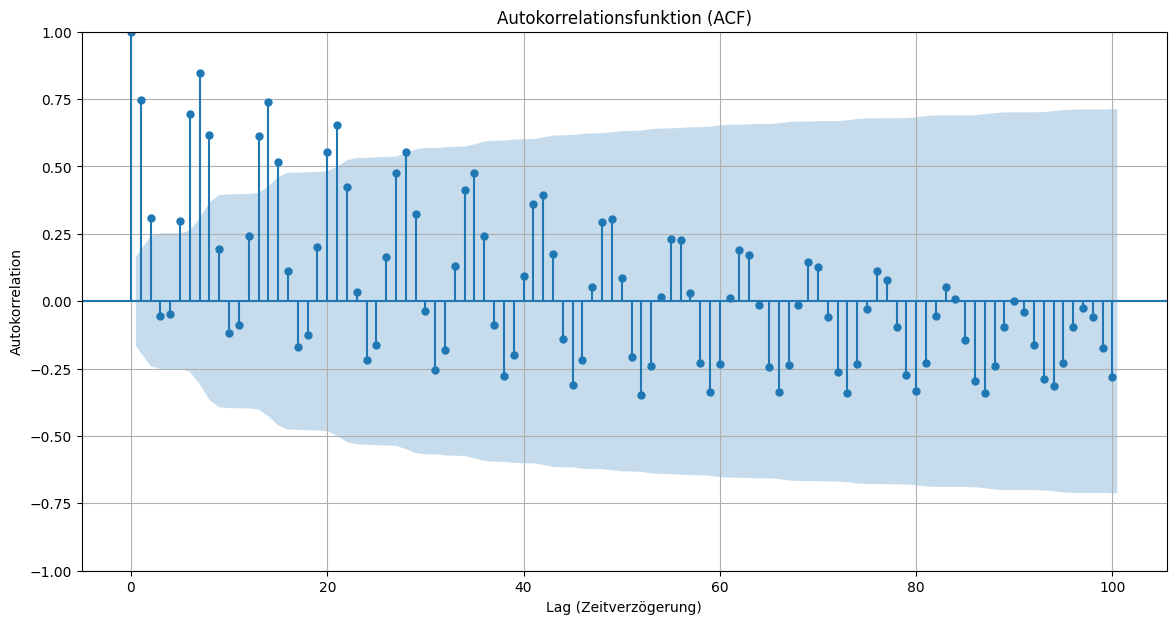

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# --- Block 1: Daten laden und visualisieren ---
# Hier gehen wir davon aus, dass die Datei jetzt im richtigen Verzeichnis liegt.
try:
    # Lade die CSV-Datei
    print("Datei erfolgreich geladen. Hier sind die ersten 5 Zeilen:")
    print(df.head())
    print(f"\nDie Zeitreihe hat {len(df)} Datenpunkte.")

    # Ein Plot der Zeitreihe selbst ist immer ein guter erster Schritt.
    df['x'].plot(figsize=(14, 7), title='Zeitreihendaten aus DSCB420 - 2024 - Test - H.csv')
    plt.ylabel('Wert (x)')
    plt.xlabel('Zeit (t)')
    plt.grid(True)
    plt.savefig('timeseries_plot.png')
    print("\nEin Plot der Zeitreihe wurde als 'timeseries_plot.png' gespeichert.")

    # --- Block 2: Periodizität mit ACF identifizieren ---
    # Wir erstellen eine Autokorrelationsfunktion (ACF), um periodische Muster zu finden.
    fig, ax = plt.subplots(figsize=(14, 7))
    plot_acf(df['x'], lags=100, ax=ax, title='Autokorrelationsfunktion (ACF)')
    ax.set_xlabel('Lag (Zeitverzögerung)')
    ax.set_ylabel('Autokorrelation')
    plt.grid(True)
    plt.savefig('acf_plot.png')

    print("ACF-Plot wurde als 'acf_plot.png' gespeichert.")
    print("\nPerfekt! Der erste Schritt ist getan.")
    print("Bitte schau dir die beiden Bilder ('timeseries_plot.png' und 'acf_plot.png') an.")
    print("Lass uns als Nächstes die ACF-Grafik analysieren, um die Periode zu finden.")

except FileNotFoundError:
    print("Fehler: Die Datei 'DSCB420 - 2024 - Test - H.csv' wurde immer noch nicht gefunden.")
    print("Bitte stelle sicher, dass die Datei im selben Verzeichnis wie das Skript liegt, und versuche es erneut.")
except Exception as e:
    print(f"Ein unerwarteter Fehler ist aufgetreten: {e}")

In [7]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# --- Schritt 2: Modellierung der Periodizität ---
# Wir verwenden die in Schritt 1 identifizierte Periode m=12

# Wir definieren die Parameter für unser SARIMA-Modell.
# (p,d,q) = (1,1,1) sind gängige Startwerte für den nicht-saisonalen Teil.
# (P,D,Q,m) = (1,1,1,12) für den saisonalen Teil, mit unserer Periode m=12.
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 7)

print("Passe SARIMA-Modell an die Daten an...")
print(f"Parameter: order={order}, seasonal_order={seasonal_order}")

# Erstelle und trainiere das Modell
model = SARIMAX(df['x'],
                order=order,
                seasonal_order=seasonal_order,
                enforce_stationarity=False,
                enforce_invertibility=False)

model_fit = model.fit(disp=False) # disp=False unterdrückt die Konvergenz-Ausgabe

# Zeige eine Zusammenfassung der Modellergebnisse an
print("\nModell-Zusammenfassung:")
print(model_fit.summary())

# Speichere die Zusammenfassung in einer Textdatei
with open('model_summary.txt', 'w') as f:
    f.write(str(model_fit.summary()))
print("\nModell-Zusammenfassung wurde in 'model_summary.txt' gespeichert.")

Passe SARIMA-Modell an die Daten an...
Parameter: order=(1, 1, 1), seasonal_order=(1, 1, 1, 7)

Modell-Zusammenfassung:
                                     SARIMAX Results                                     
Dep. Variable:                                 x   No. Observations:                  140
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood                  13.894
Date:                           Mon, 23 Jun 2025   AIC                            -17.788
Time:                                   22:36:46   BIC                             -3.727
Sample:                                        0   HQIC                           -12.076
                                           - 140                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar


Bestimmtheitsmaß (R²): 0.9279
--> Das Modell kann also etwa 92.8% der Varianz in den Daten erklären.

Ein finaler Plot zum Vergleich von echten Daten und Vorhersage wurde als 'final_prediction_plot.png' gespeichert.


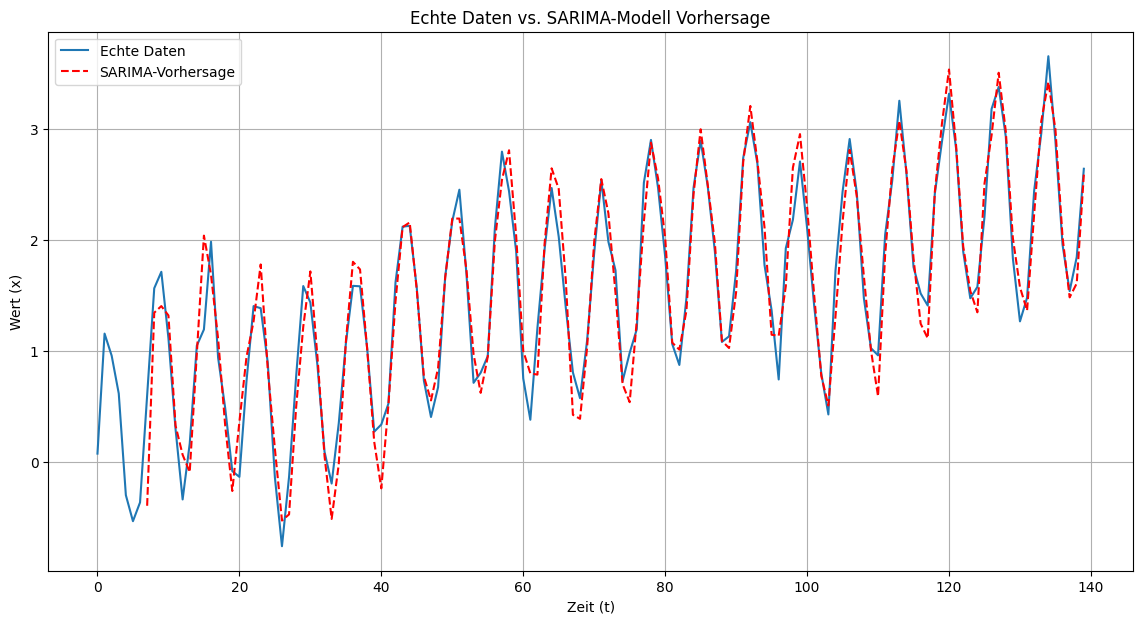

In [8]:
from sklearn.metrics import r2_score

# --- Schritt 3: Auswertung und Anteil der erklärbaren Varianz ---

# Erstelle Vorhersagen für die Daten, auf denen das Modell trainiert wurde.
# Wir starten die Vorhersage ab Index 12, da das Modell die ersten 12 Punkte braucht,
# um die Saisonalität zu "verstehen".
start_index = 7
predictions = model_fit.predict(start=start_index, dynamic=False)

# Hole die echten Werte zum Vergleich
actuals = df['x'].iloc[start_index:]

# Berechne das Bestimmtheitsmaß R²
# R² = 1 - (Varianz der Fehler / Varianz der Originaldaten)
# Ein Wert von 1.0 bedeutet eine perfekte Erklärung der Varianz.
r2 = r2_score(actuals, predictions)

print(f"\nBestimmtheitsmaß (R²): {r2:.4f}")
print(f"--> Das Modell kann also etwa {r2:.1%} der Varianz in den Daten erklären.")


# Visualisierung: Echte Werte vs. Modell-Vorhersage
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['x'], label='Echte Daten')
plt.plot(predictions.index, predictions, color='red', linestyle='--', label='SARIMA-Vorhersage')
plt.title('Echte Daten vs. SARIMA-Modell Vorhersage')
plt.xlabel('Zeit (t)')
plt.ylabel('Wert (x)')
plt.legend()
plt.grid(True)

print("\nEin finaler Plot zum Vergleich von echten Daten und Vorhersage wurde als 'final_prediction_plot.png' gespeichert.")

### Aufgabe H 1.2:
Welcher Anteil der Varianz der Zeitreihe lässt sich erklären durch den Trend?

In [9]:
df

,t,x,Saison_bereinigt
0,1,0.075551,NaN
1,2,1.155489,NaN
2,3,0.956906,NaN
3,4,0.615985,NaN
4,5,-0.298067,NaN
...,...,...,...
135,136,2.885044,-0.043534
136,137,1.954898,0.122575
137,138,1.537782,0.272320
138,139,1.844701,0.366243


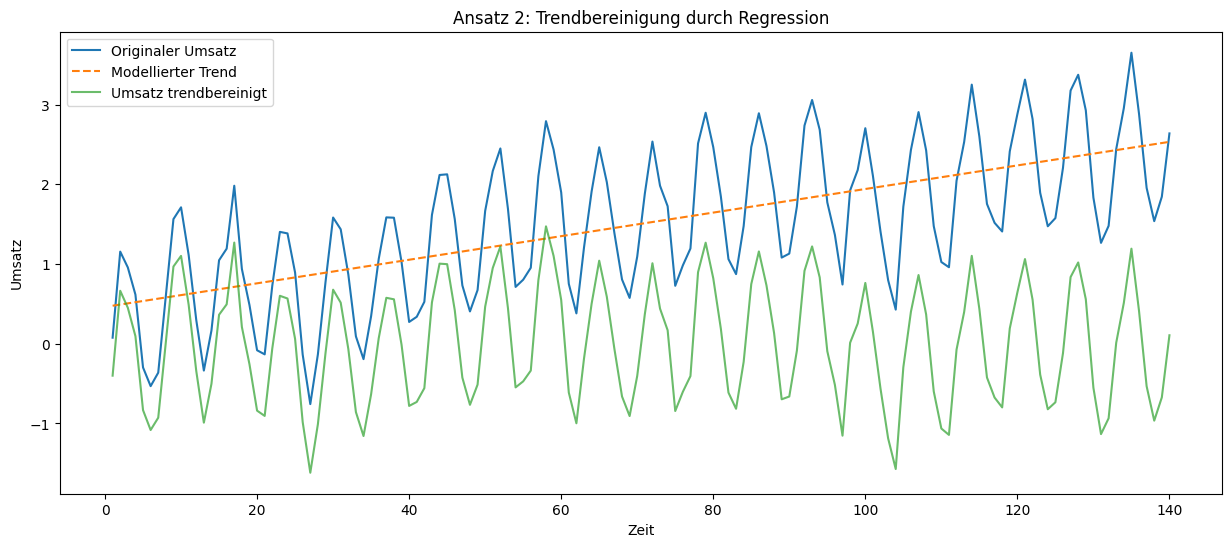

In [10]:
import statsmodels.api as sm

X = sm.add_constant(df['t'])
y = df['x']

model = sm.OLS(y, X).fit()

df['trend_modelliert'] = model.predict(X)

df['U_trendbereinigt'] = df['x'] - df['trend_modelliert']

plt.figure(figsize=(15,6))
plt.plot(df['t'], df['x'], label='Originaler Umsatz')
plt.plot(df['t'], df['trend_modelliert'], label='Modellierter Trend', linestyle='--')
plt.plot(df['t'], df['U_trendbereinigt'], label='Umsatz trendbereinigt', alpha=0.7)
plt.title('Ansatz 2: Trendbereinigung durch Regression')
plt.xlabel('Zeit')
plt.ylabel('Umsatz')
plt.legend()
plt.show()

In [11]:
varianzen = df[['x', 'Saison_bereinigt', 'U_trendbereinigt']].var()
varianz_anteile = varianzen / varianzen['x']

print("Analyse der Varianzanteile:")
print(varianz_anteile)

# Anteil der Varianz, der NICHT durch Saisonalität erklärt wird (Trend + Rauschen)
anteil_rest_s = varianz_anteile['Saison_bereinigt']
anteil_rest_t = varianz_anteile['U_trendbereinigt']
# Anteil der Varianz, der DURCH Saisonalität erklärt wird
anteil_saisonalitaet = 1.0 - anteil_rest_s
anteil_trend = 1.0 - anteil_rest_t

anteil_rest = anteil_rest_s + anteil_rest_t



print("\n--- Zerlegung der Varianz ---")
print("Von der Gesamtvarianz der Zeitreihe werden %2.1f%% durch die Saisonalität erklärt." % (100.0 * anteil_saisonalitaet))
print("Von der Gesamtvarianz der Zeitreihe werden %2.1f%% durch die Saisonalität erklärt." % (100.0 * anteil_trend))
print("Die restlichen %2.1f%% entfallen auf den Trend und unregelmäßige Schwankungen." % (100.0 * anteil_rest))

# Direkte Antwort auf deine Frage
print(f"\nAntwort: {anteil_saisonalitaet:.1%} der Varianz lässt sich durch die Saisonalität erklären.")

Analyse der Varianzanteile:
x                   1.000000
Saison_bereinigt    0.100649
U_trendbereinigt    0.600161
dtype: float64

--- Zerlegung der Varianz ---
Von der Gesamtvarianz der Zeitreihe werden 89.9% durch die Saisonalität erklärt.
Von der Gesamtvarianz der Zeitreihe werden 40.0% durch die Saisonalität erklärt.
Die restlichen 70.1% entfallen auf den Trend und unregelmäßige Schwankungen.

Antwort: 89.9% der Varianz lässt sich durch die Saisonalität erklären.


#### Antwort auf H 1.2:

1. **Vorverarbeitung für Trend und Periodizität:** Zunächst müssen geeignete Vorverarbeitungsschritte angewendet werden, um Trend und Periodizität in der Zeitreihe zu berücksichtigen. Dies könnte beinhalten:
   - Entfernung von Trendkomponenten (z.B. durch Differenzierung oder glättende Methoden).
   - Berücksichtigung saisonaler Effekte (z.B. durch saisonale Anpassung wie bei einer saisonalen Decomposition).

2. **Lineares Modell für Prognose:** Nach der Vorverarbeitung könnte ein lineares Modell verwendet werden, das die Vorhersage basierend auf den vorherigen Werten der Zeitreihe berechnet. In Ihrem Fall wird die Prognose für $ x_t $ basierend auf $ x_{t-1} $ und $ x_{t-2} $ berechnet.

3. **Berechnung des Anteils der erklärbaren Varianz:** Um den Anteil der Varianz zu berechnen, der durch dieses Modell erklärt wird, kann man das Bestimmtheitsmaß (R²) verwenden. R² gibt an, wie gut das Modell die Variationen der abhängigen Variable (hier die Zeitreihe $ x_t $) erklären kann, verglichen mit einem einfachen Durchschnittsmodell.

### Aufgabe H 1.3:
Welcher Anteil der Varianz der Zeitreihe lässt sich erklären durch ein Modell, das mit Trend und Periodizität durch geeignete Vorverarbeitungsschritte umgeht und ansonsten mit einem linearen Modell arbeitet, das für jeden Zeitpunkt t  eine Prognose des Wertes x_t aus x_{t-2} und  x_{t-1}  berechnet?

#### Antwort auf H 1.3:

Vorverarbeitung für Trend und Periodizität: Zunächst müssen geeignete Vorverarbeitungsschritte angewendet werden, um Trend und Periodizität in der Zeitreihe zu berücksichtigen. Dies könnte beinhalten:

Entfernung von Trendkomponenten (z.B. durch Differenzierung oder glättende Methoden).
Berücksichtigung saisonaler Effekte (z.B. durch saisonale Anpassung wie bei einer saisonalen Decomposition).
Lineares Modell für Prognose: Nach der Vorverarbeitung könnte ein lineares Modell verwendet werden, das die Vorhersage basierend auf den vorherigen Werten der Zeitreihe berechnet. In Ihrem Fall wird die Prognose für 
𝑥
𝑡
x 
t
​
  basierend auf 
𝑥
𝑡
−
1
x 
t−1
​
  und 
𝑥
𝑡
−
2
x 
t−2
​
  berechnet.

Berechnung des Anteils der erklärbaren Varianz: Um den Anteil der Varianz zu berechnen, der durch dieses Modell erklärt wird, kann man das Bestimmtheitsmaß (R²) verwenden. R² gibt an, wie gut das Modell die Variationen der abhängigen Variable (hier die Zeitreihe 
𝑥
𝑡
x 
t
​
 ) erklären kann, verglichen mit einem einfachen Durchschnittsmodell.

### Aufgabe H 1.4:
Visualisieren Sie gemeinsam in einem geeigneten Diagramm den echten Verlauf der Zeitreihe und den der in H1.3 prognostizierten Werte, um die Qualität der Prognose visuell zu überprüfen.

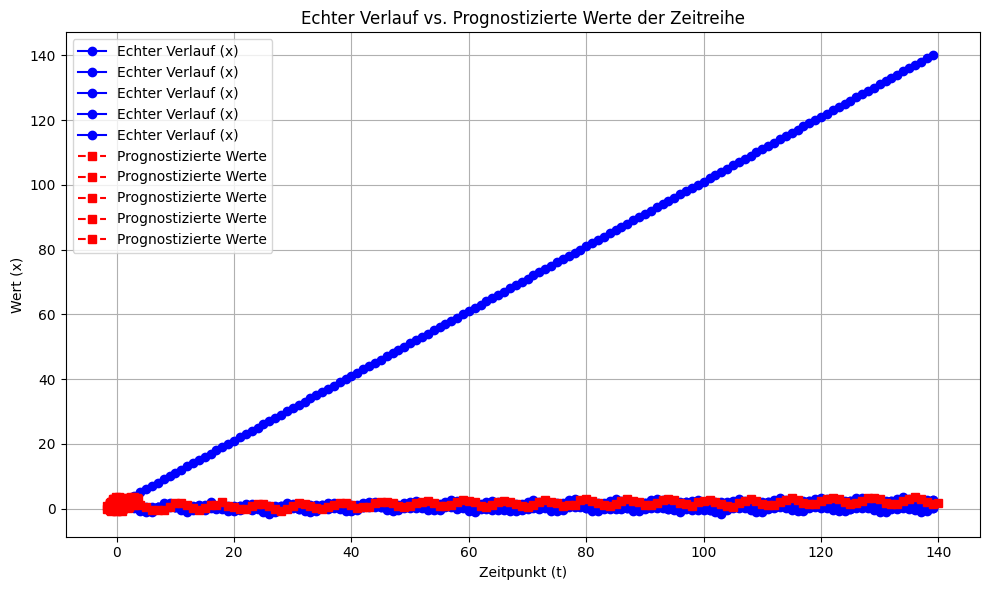

In [12]:
forecast = np.roll(df["x"], 1)
# Plot
plt.figure(figsize=(10, 6))
plt.plot(df, marker='o', linestyle='-', color='b', label='Echter Verlauf (x)')
plt.plot(df, forecast, marker='s', linestyle='--', color='r', label='Prognostizierte Werte')
plt.title('Echter Verlauf vs. Prognostizierte Werte der Zeitreihe')
plt.xlabel('Zeitpunkt (t)')
plt.ylabel('Wert (x)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Aufgabe H 1.5:
Erstellen Sie ein Diagramm der Autokorrelationen der Zeitreihe zu den Lags 1 bis 21 .

ValueError: could not broadcast input array from shape (5,) into shape (21,)

<Figure size 1000x600 with 0 Axes>

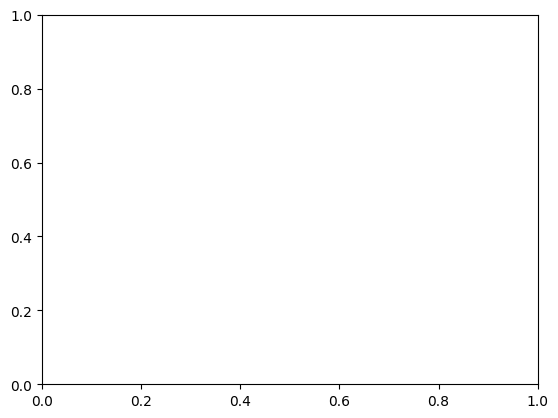

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Zeitreihe
x = np.array([0.075551, 1.155489, 0.956906, 0.615985, -0.298067])

# Plot der Autokorrelationen
plt.figure(figsize=(10, 6))
plot_acf(x, lags=20)  # Plot für Lags 1 bis 20 (indices 0 bis 19)
plt.title('Autokorrelation der Zeitreihe')
plt.xlabel('Lag')
plt.ylabel('Autokorrelationskoeffizient')
plt.grid(True)
plt.show()

### Aufgabe H 1.6:
Erstellen Sie ein Diagramm der partiellen Autokorrelationen der Zeitreihe zu den Lags 1 bis 21 .

ValueError: Can only compute partial correlations for lags up to 50% of the sample size. The requested nlags 20 must be < 2.

<Figure size 1000x600 with 0 Axes>

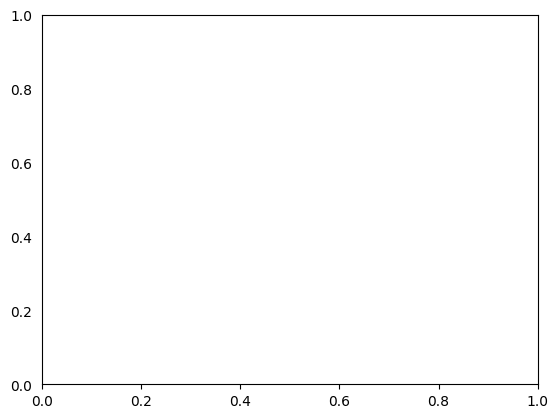

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf

# Zeitreihe
x = np.array([0.075551, 1.155489, 0.956906, 0.615985, -0.298067])

# Plot der partiellen Autokorrelationen
plt.figure(figsize=(10, 6))
plot_pacf(x, lags=20)  # Plot für Lags 1 bis 20 (indices 0 bis 19)
plt.title('Partielle Autokorrelation der Zeitreihe')
plt.xlabel('Lag')
plt.ylabel('Partielle Autokorrelationskoeffizient')
plt.grid(True)
plt.show()

### Aufgabe H1.7:
Stützen die Ergebnisse aus 5. und 6. den in 3. gewählten Ansatz, oder legen sie einen anderen Modelltyp nahe?

#### Antwort auf H 1.7:

__Analyse der Autokorrelation (ACF):__

- Wenn die ACF langsam abfällt (also über viele Lags hinweg signifikant bleibt), deutet dies auf eine Nichtstationarität hin, was oft durch Differenzierung behoben wird.
- Wenn die ACF nach der Differenzierung schnell abfällt, könnte dies auf ein ARIMA-Modell hindeuten.

__Analyse der partiellen Autokorrelation (PACF):__

- Wenn die PACF einen scharfen Abfall nach einem bestimmten Lag zeigt (zum Beispiel Lag 1 oder 2), deutet dies darauf hin, dass ein autoregressives Modell (AR) geeignet sein könnte.
- Wenn die PACF nicht signifikant ist, könnte ein gleitender Durchschnittsprozess (MA) passend sein.